### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
dataset = pd.read_csv('Healthcare_dataset.csv')
dataset.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [3]:
dataset.shape

(3424, 69)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

### Checking for Null and Duplicated Values

In [5]:
dataset.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [6]:
dataset.isnull().sum().sum()

0

In [7]:
dataset.duplicated().sum()

0

We do not to bother about null values and duplicated values because the dataset has non.

### Outlier Detection

From the dataset info above, it can be seen that only two columns are of integer(numerical) entries while the rest of the columns have object(categorical) entries. We shall proceed with detecting the outliers in the the two columns with numerical entries which are; Dexa_Freq_During_Rx and Count_Of_Risks

### Box plot for the Dexa_Freq_During_Rx column

C:\Users\Pass\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pass\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


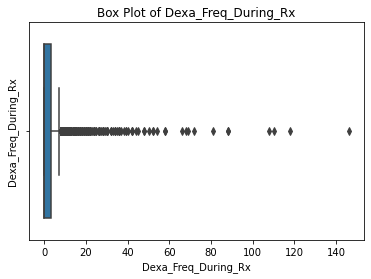

In [12]:
column1_name = 'Dexa_Freq_During_Rx'
sns.boxplot(dataset[column1_name], orient='v', showfliers=True)
plt.title('Box Plot of ' + column1_name)
plt.ylabel( column1_name)
plt.show()

### Histogram for the Dexa_Freq_During_Rx column to check skewness

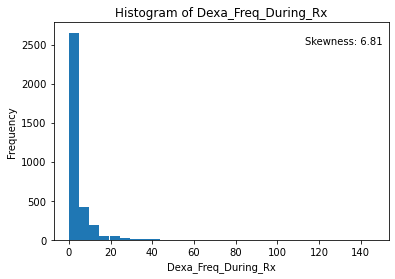

In [13]:
plt.hist(dataset[column1_name], bins=30)
plt.title('Histogram of ' + column1_name)
plt.xlabel(column1_name)
plt.ylabel('Frequency')
skewness = dataset[column1_name].skew()
plt.text(0.75, 0.9, 'Skewness: {:.2f}'.format(skewness), transform=plt.gca().transAxes)

plt.show()

A skewness value of 6.81 suggests a significant positive skew, meaning that the distribution has a long tail on the right side. In practical terms, a positive skewness value of 6.81 indicates that the data has a concentration of values on the left side (lower values) and a few extremely high values that pull the mean towards the right. The tail of the distribution extends towards the higher values, indicating the presence of outliers or extreme values in the dataset.

Define a function to detect and drop outliers using Interquartile Range (IQR)

In [14]:
def detect_outliers_iqr(dataset, column1_name):
    q1 = dataset[column1_name].quantile(0.25)
    q3 = dataset[column1_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (dataset[column1_name] < lower_bound) | (dataset[column1_name] > upper_bound)

In [19]:
column_to_check = 'Dexa_Freq_During_Rx'
dataset = dataset.drop(dataset[detect_outliers_iqr(dataset, column_to_check)].index)

In [20]:
print(dataset)

       Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0 

After detecting the outliers in the Dexa_Freq_During_Rx column and dropping them, the new result of the dataset shape shows that 460 outliers were detected and dropped.

### Box plot for the Count_Of_Risks column

C:\Users\Pass\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pass\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


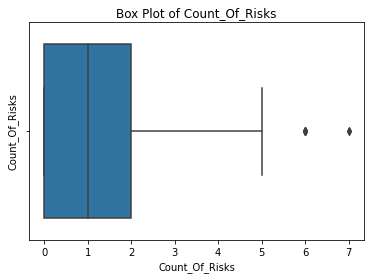

In [21]:
column2_name = 'Count_Of_Risks'
sns.boxplot(dataset[column2_name], orient='v', showfliers=True)
plt.title('Box Plot of ' + column2_name)
plt.ylabel(column2_name)
plt.show()

### Histogram for the Count_Of_Risks column to check skewness

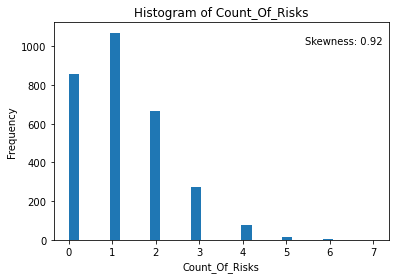

In [22]:
plt.hist(dataset[column2_name], bins=30)
plt.title('Histogram of ' + column2_name)
plt.xlabel(column2_name)
plt.ylabel('Frequency')
skewness = dataset[column2_name].skew()
plt.text(0.75, 0.9, 'Skewness: {:.2f}'.format(skewness), transform=plt.gca().transAxes)

plt.show()

In practical terms, a positive skewness value of 0.92 suggests that the data is not perfectly symmetrical. It indicates that the distribution has a longer tail on the right side and may have some outliers or extreme values on the higher end. However, the skewness is not significantly large, indicating a relatively mild departure from symmetry.

In [23]:
next_column_to_check = 'Count_Of_Risks'
dataset = dataset.drop(dataset[detect_outliers_iqr(dataset, next_column_to_check)].index)

In [24]:
print(dataset)

       Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0 

In [25]:
dataset.shape

(2956, 69)

After dropping the outliers in the Count_Of_Risks column, it is discovered that there were 8 outliers 

### Analysis of Target Variable using pie chart

In [26]:
target_counts = dataset['Persistency_Flag'].value_counts()
target_counts

Non-Persistent    2053
Persistent         903
Name: Persistency_Flag, dtype: int64

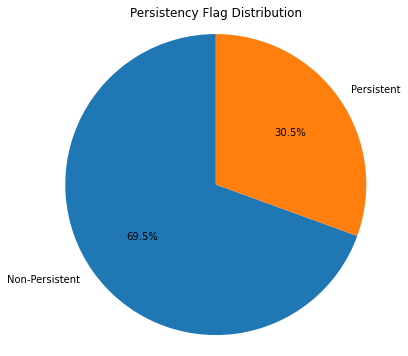

In [27]:
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persistency Flag Distribution')
plt.axis('equal')
plt.show()

From the pie chart above, it can be deduced that the percentage of non-persistent patients is more than the percentage of persistent patients with values of 69.5% and 30.5% respectively.

### Data Transformation

The patient id is dropped, because it has no relevance in the analysis to be carried out. There is no significance of the ptid column.

In [29]:
dataset = dataset.drop(['Ptid'], axis=1)

In [30]:
dataset

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


After dropping the patient id column, the new shape of our dataset is (2956, 68). The number of columns went from 69 to 68.

### Value_Counts for Each Column 

In [31]:
dataset['Gender'].value_counts()

Female    2782
Male       174
Name: Gender, dtype: int64

In [32]:
dataset['Race'].value_counts()

Caucasian           2715
African American      92
Other/Unknown         80
Asian                 69
Name: Race, dtype: int64

In [33]:
dataset['Ethnicity'].value_counts()

Not Hispanic    2797
Hispanic          82
Unknown           77
Name: Ethnicity, dtype: int64

In [35]:
dataset['Region'].value_counts()

Midwest          1212
South            1116
West              384
Northeast         195
Other/Unknown      49
Name: Region, dtype: int64

In [36]:
dataset['Age_Bucket'].value_counts()

>75      1264
65-75     921
55-65     624
<55       147
Name: Age_Bucket, dtype: int64

In [37]:
dataset['Ntm_Speciality'].value_counts()

GENERAL PRACTITIONER                                              1350
RHEUMATOLOGY                                                       510
ENDOCRINOLOGY                                                      367
Unknown                                                            284
ONCOLOGY                                                           187
OBSTETRICS AND GYNECOLOGY                                           80
UROLOGY                                                             30
ORTHOPEDIC SURGERY                                                  26
CARDIOLOGY                                                          21
OTOLARYNGOLOGY                                                      13
PATHOLOGY                                                           13
HEMATOLOGY & ONCOLOGY                                               12
PHYSICAL MEDICINE AND REHABILITATION                                11
PEDIATRICS                                                           9
SURGER

In [38]:
dataset['Ntm_Specialist_Flag'].value_counts()

Others        1781
Specialist    1175
Name: Ntm_Specialist_Flag, dtype: int64

In [39]:
dataset['Ntm_Speciality_Bucket'].value_counts()

OB/GYN/Others/PCP/Unknown    1862
Endo/Onc/Uro                  584
Rheum                         510
Name: Ntm_Speciality_Bucket, dtype: int64

In [40]:
dataset['Gluco_Record_Prior_Ntm'].value_counts()

N    2251
Y     705
Name: Gluco_Record_Prior_Ntm, dtype: int64

In [41]:
dataset['Gluco_Record_During_Rx'].value_counts()

N    2216
Y     740
Name: Gluco_Record_During_Rx, dtype: int64

In [43]:
dataset['Tscore_Bucket_Prior_Ntm'].value_counts()

>-2.5     1695
<=-2.5    1261
Name: Tscore_Bucket_Prior_Ntm, dtype: int64

In [44]:
dataset['Change_T_Score'].value_counts()

No change    1397
Unknown      1365
Worsened      134
Improved       60
Name: Change_T_Score, dtype: int64

In [45]:
dataset['Dexa_During_Rx'].value_counts()

N    2483
Y     473
Name: Dexa_During_Rx, dtype: int64

In [46]:
dataset['Risk_Segment_Prior_Ntm'].value_counts()

VLR_LR    1682
HR_VHR    1274
Name: Risk_Segment_Prior_Ntm, dtype: int64

In [47]:
dataset['Change_Risk_Segment'].value_counts()

Unknown      1977
No change     869
Worsened       95
Improved       15
Name: Change_Risk_Segment, dtype: int64

In [48]:
dataset['Frag_Frac_Prior_Ntm'].value_counts()

N    2505
Y     451
Name: Frag_Frac_Prior_Ntm, dtype: int64

In [49]:
dataset['Frag_Frac_During_Rx'].value_counts()

N    2623
Y     333
Name: Frag_Frac_During_Rx, dtype: int64

In [50]:
dataset['Adherent_Flag'].value_counts()

Adherent        2821
Non-Adherent     135
Name: Adherent_Flag, dtype: int64

In [51]:
dataset['Injectable_Experience_During_Rx'].value_counts()

Y    2629
N     327
Name: Injectable_Experience_During_Rx, dtype: int64

In [52]:
dataset['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'].value_counts()

N    2444
Y     512
Name: Comorb_Personal_History_Of_Other_Diseases_And_Conditions, dtype: int64

In [53]:
dataset['Concom_Viral_Vaccines'].value_counts()

N    2676
Y     280
Name: Concom_Viral_Vaccines, dtype: int64

In [54]:
dataset['Risk_Type_1_Insulin_Dependent_Diabetes'].value_counts()

N    2832
Y     124
Name: Risk_Type_1_Insulin_Dependent_Diabetes, dtype: int64

### Mapping categorical Features

In [55]:
map_cat = {'N':0, 'Y':1}
dataset = dataset.replace(map_cat)

In [56]:
dataset_cols = dataset.columns[(dataset.dtypes == 'object') & (dataset.columns!= 'Persistency_Flag')]
dataset_cols

Index(['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality',
       'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm',
       'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Change_Risk_Segment', 'Adherent_Flag'],
      dtype='object')

In [57]:
dataset

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,1,0,0,0,0,0,0,0,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,1,0,0,0,0,0,0,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,0,...,0,0,1,0,0,0,0,0,0,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
map_gender = {'Female':0, 
            'Male':1,
          }
dataset['Gender'] = dataset['Gender'].replace(map_gender)
dataset['Gender'] = dataset['Gender'].astype(int)

In [60]:
map_NSF = {'Others':0, 
            'Specialist':1,
          }
dataset['Ntm_Specialist_Flag'] = dataset['Ntm_Specialist_Flag'].replace(map_NSF)
dataset['Ntm_Specialist_Flag'] = dataset['Ntm_Specialist_Flag'].astype(int)

In [61]:
map_adherence = {'Non-Adherent':0, 
            'Adherent':1,
          }
dataset['Adherent_Flag'] = dataset['Adherent_Flag'].replace(map_adherence)
dataset['Adherent_Flag'] = dataset['Adherent_Flag'].astype(int)

In [70]:
map_persistency = {'Non-Persistent':0, 
            'Persistent':1,
          }
dataset['Persistency_Flag'] = dataset['Persistency_Flag'].replace(map_persistency)
dataset['Persistency_Flag'] = dataset['Persistency_Flag'].astype(int)

In [71]:
dataset

,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Adherent_Flag,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,2
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3420,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,1,0,1,0,0,7,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3422,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### One Hot Encoding

Applying one hot encoding to avoid bias from the categorical data column

In [73]:
dataset_cols = dataset.columns[(dataset.dtypes == 'object') & (dataset.columns!= 'Persistency_Flag')]
dataset_cols

Index([], dtype='object')

In [74]:
dataset_encoded = pd.get_dummies(dataset, columns = dataset_cols, prefix = dataset_cols)

In [75]:
dataset_encoded

,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Adherent_Flag,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,2
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3420,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,1,0,1,0,0,7,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3422,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [76]:
dataset_encoded[dataset_encoded.columns] = dataset_encoded
dataset.drop(dataset_cols, axis=1, inplace=True)

In [77]:
dataset_cols = dataset.columns[(dataset.dtypes == 'object')]
dataset_cols


Index([], dtype='object')

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 3423
Data columns (total 56 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Persistency_Flag                                                    2956 non-null   int32
 1   Gender                                                              2956 non-null   int32
 2   Ntm_Specialist_Flag                                                 2956 non-null   int32
 3   Gluco_Record_Prior_Ntm                                              2956 non-null   int64
 4   Gluco_Record_During_Rx                                              2956 non-null   int64
 5   Dexa_Freq_During_Rx                                                 2956 non-null   int64
 6   Dexa_During_Rx                                                      2956 non-null   int64
 7   Frag_Frac_Prior_Ntm              

After the whole transformation process, it is noticed that all the columns with categorical(object) entires have all been changed to numerical entries for easy machine learning model building. 